In [2]:
#1.(a)
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

digits = load_digits()
faces = fetch_olivetti_faces()

X_digits = digits.data
y_digits = digits.target
X_digits_train,X_digits_test,y_digits_train,y_digits_test = train_test_split(X_digits,y_digits,test_size=0.25,random_state=42)

X_faces = faces.data
y_faces = faces.target
X_faces_train,X_faces_test,y_faces_train,y_faces_test = train_test_split(X_faces,y_faces,test_size=0.25,random_state=42)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/nbuser/scikit_learn_data


CPU times: user 30.1 s, sys: 9.58 s, total: 39.6 s
Wall time: 29.7 s


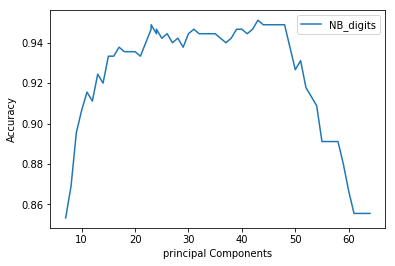

In [3]:
%%time
#1.(b) 1/4
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

digits_features = len(digits.data[0])
faces_features = len(faces.data[0])

accuracy = []
pc = []

for i in range(90):
    pca = PCA(n_components=int((1 - i/100)*digits_features)).fit(X_digits_train)
    X_digits_train_reduced = pca.transform(X_digits_train)
    X_digits_test_reduced = pca.transform(X_digits_test)
    model = GaussianNB()
    model.fit(X_digits_train_reduced,y_digits_train)
    y_pred = model.predict(X_digits_test_reduced)
    accuracy.append(accuracy_score(y_pred,y_digits_test))
    pc.append(int((1 - i/100)*digits_features))

plt.plot(pc,accuracy,label = "NB_digits")
plt.ylabel("Accuracy")
plt.xlabel("principal Components")
plt.legend()
    

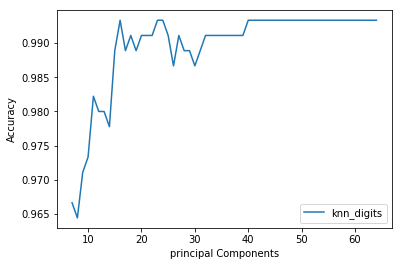

In [4]:
# 2/4
accuracy = []
pc = []

for i in range(90):
    pca = PCA(n_components=int((1 - i/100)*digits_features)).fit(X_digits_train)
    X_digits_train_reduced = pca.transform(X_digits_train)
    X_digits_test_reduced = pca.transform(X_digits_test)
    model = KNeighborsClassifier()
    model.fit(X_digits_train_reduced,y_digits_train)
    y_pred = model.predict(X_digits_test_reduced)
    accuracy.append(accuracy_score(y_pred,y_digits_test))
    pc.append(int((1 - i/100)*digits_features))

plt.plot(pc,accuracy,label = "knn_digits")
plt.ylabel("Accuracy")
plt.xlabel("principal Components")
plt.legend()

CPU times: user 2min 15s, sys: 55.7 s, total: 3min 10s
Wall time: 1min 36s


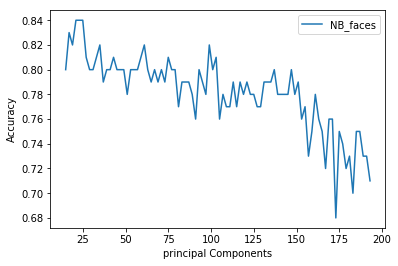

In [5]:
%%time
# 3/4

accuracy = []
pc = []

for i in range(90):
    pca = PCA(i*2+15).fit(X_faces_train)
    X_faces_train_reduced = pca.transform(X_faces_train)
    X_faces_test_reduced = pca.transform(X_faces_test)
    model = GaussianNB()
    model.fit(X_faces_train_reduced,y_faces_train)
    y_pred = model.predict(X_faces_test_reduced)
    accuracy.append(accuracy_score(y_pred,y_faces_test))
    pc.append(i*2+15)

plt.plot(pc,accuracy,label = "NB_faces")
plt.ylabel("Accuracy")
plt.xlabel("principal Components")
plt.legend()

CPU times: user 2min 19s, sys: 53.9 s, total: 3min 13s
Wall time: 1min 36s


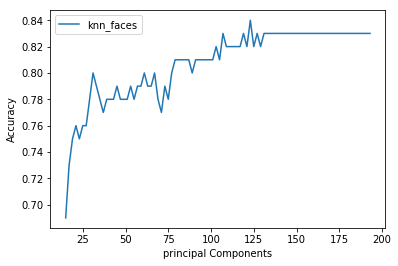

In [6]:
%%time
# 4/4
accuracy = []
pc = []

for i in range(90):
    pca = PCA(n_components =2*i+15).fit(X_faces_train)
    X_faces_train_reduced = pca.transform(X_faces_train)
    X_faces_test_reduced = pca.transform(X_faces_test)
    model = KNeighborsClassifier()
    model.fit(X_faces_train_reduced,y_faces_train)
    y_pred = model.predict(X_faces_test_reduced)
    accuracy.append(accuracy_score(y_pred,y_faces_test))
    pc.append(i*2+15)

plt.plot(pc,accuracy,label = "knn_faces")
plt.ylabel("Accuracy")
plt.xlabel("principal Components")
plt.legend()

In [7]:
#2.(a) 
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

data_lonely = pd.read_csv("Lonely.csv",header=None)
X_lonely = data_lonely[1]
y_lonely = data_lonely[0]

data_spam = pd.read_csv("smsspam.csv",header=None)
X_spam = data_spam[1]
y_spam = data_spam[0]

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [15]:
#2.(b)
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


count = CountVectorizer()
tfidf = TfidfTransformer(use_idf=True,norm ='l2',smooth_idf=True)
np.set_printoptions(precision=2)

X_lonely_bag = count.fit_transform(X_lonely).toarray()

clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
eclf = VotingClassifier(estimators=[('lr',clf1),('gnb',clf2),('knn',clf3)],voting='hard')
bagging = BaggingClassifier(clf2,max_samples=50,n_estimators =10)
adabooster = AdaBoostClassifier(clf2,n_estimators =20)

models = [clf1,clf2,clf3,eclf,bagging,adabooster]
scores = []


for model in models:
    scores.append(cross_val_score(model,X_lonely_bag,y_lonely,cv=kfold).mean())
scores

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

[0.7972727272727274,
 0.8036363636363637,
 0.6990909090909091,
 0.8072727272727273,
 0.8545454545454545,
 0.8136363636363637]

In [14]:
X_spam_bag = count.fit_transform(X_spam).toarray()

clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
eclf = VotingClassifier(estimators=[('lr',clf1),('gnb',clf2),('knn',clf3)],voting='hard')
bagging = BaggingClassifier(clf1,n_estimators =30)
adabooster = AdaBoostClassifier(clf1,n_estimators =40)

models = [clf1,clf2,clf3,eclf,bagging,adabooster]
scores = []


for model in models:
    scores.append(cross_val_score(model,X_spam_bag,y_spam,cv=kfold).mean())
scores

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an 

[0.9275973303670744,
 0.8071486837226548,
 0.8484056358917315,
 0.9207007786429366,
 0.9242639970337411,
 0.9242639970337411]

In [10]:
X_spam_tfidf.shape

(303, 1303)